In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_csv('US_Heart_Patients.csv')

In [42]:
df.shape

(4240, 16)

In [43]:
for feature in df.columns:
    print(f"{feature}: {df[feature].unique()}")

Gender: ['Male' 'Female' nan]
age: [39. 46. 48. 61. 43. 63. 45. 52. 50. 41. 38. 42. 44. 47. 60. 35. 36. 59.
 54. 37. 56. 53. 49. 65. 51. 62. 40. 67. 57. 66. nan 64. 55. 58. 34. 68.
 33. 70. 32. 69.]
education: [ 4.  2.  1.  3. nan]
currentSmoker: [ 0.  1. nan]
cigsPerDay: [ 0. 20. 30. 23. 15.  9. 10. nan 35. 43.  5.  1. 40.  3.  2. 12.  4. 18.
 25. 60. 14. 45.  8. 50. 13. 11.  7.  6. 38. 29. 17. 16. 19. 70.]
BP Meds: [ 0.  1. nan]
prevalentStroke: [ 0. nan  1.]
prevalentHyp: [ 0.  1. nan]
diabetes: [ 0.  1. nan]
tot cholesterol: [195. 250. 245. 225. 285. 228. 205. 313. 260. 254. 247. 294. 332.  nan
 221. 232. 291. 190. 185. 234. 215. 270. 272. 295. 226. 209. 175. 214.
 257. 178. 233. 180. 243. 237. 311. 208. 252. 261. 179. 194. 267. 216.
 240. 220. 235. 212. 223. 300. 302. 248. 200. 189. 258. 202. 213. 183.
 274. 170. 210. 197. 326. 188. 256. 244. 193. 239. 296. 269. 275. 268.
 265. 173. 273. 290. 278. 264. 282. 241. 288. 222. 303. 246. 150. 266.
 187. 286. 154. 279. 293. 259. 219. 230

#### Missing Values

In [44]:
feature_with_nan = [feature for feature in df.columns if df[feature].isnull().sum() > 0]
print(f"Total number of features containing missing values are: {len(feature_with_nan)}\n")

for feature in feature_with_nan:
    print(f"{feature}: {df[feature].isnull().mean()} Missing Values")

Total number of features containing missing values are: 15

Gender: 0.0018867924528301887 Missing Values
age: 0.0004716981132075472 Missing Values
education: 0.025943396226415096 Missing Values
currentSmoker: 0.0007075471698113207 Missing Values
cigsPerDay: 0.007311320754716981 Missing Values
BP Meds: 0.014150943396226415 Missing Values
prevalentStroke: 0.0021226415094339622 Missing Values
prevalentHyp: 0.0004716981132075472 Missing Values
diabetes: 0.0004716981132075472 Missing Values
tot cholesterol: 0.014150943396226415 Missing Values
Systolic BP: 0.0009433962264150943 Missing Values
Diastolic BP: 0.0011792452830188679 Missing Values
BMI: 0.005660377358490566 Missing Values
heartRate: 0.0009433962264150943 Missing Values
glucose: 0.09221698113207547 Missing Values


All the features except the target label

Checking if the missing values are important with respect to the target label

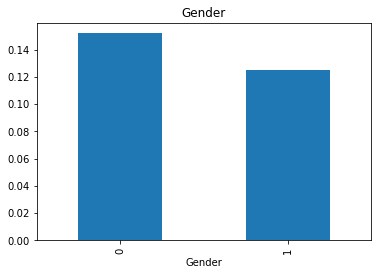

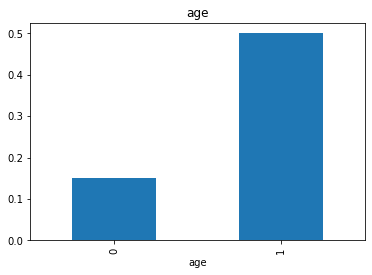

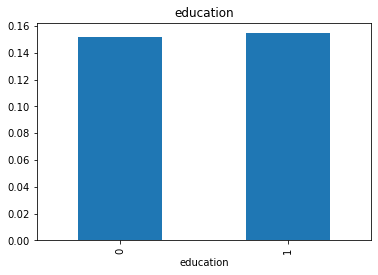

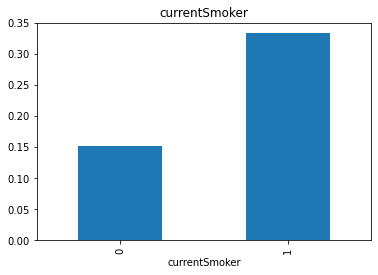

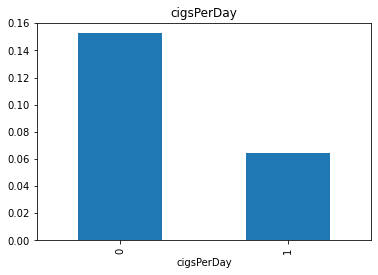

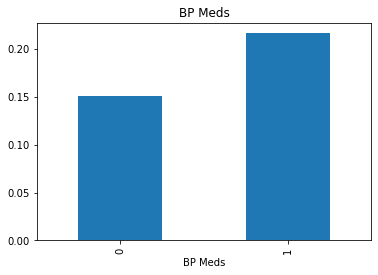

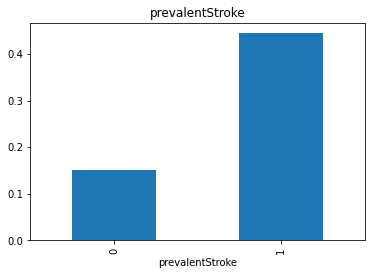

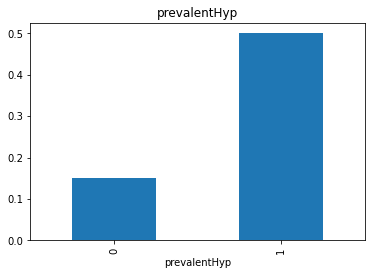

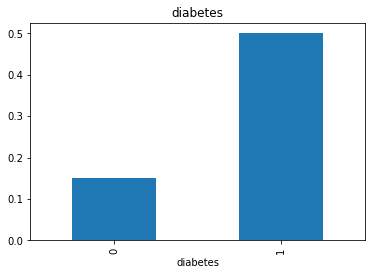

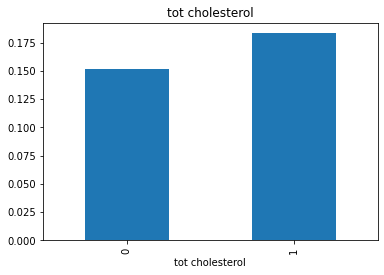

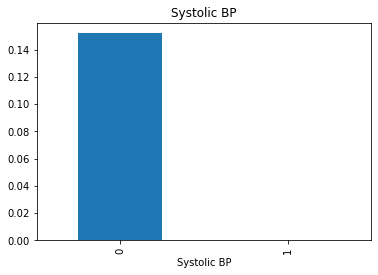

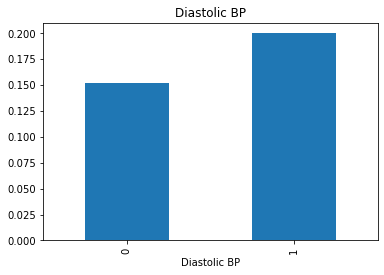

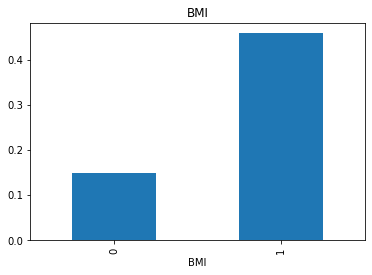

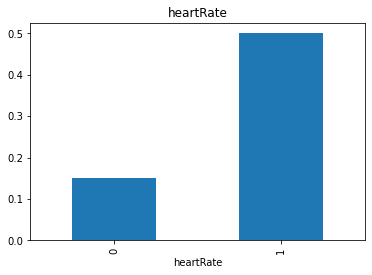

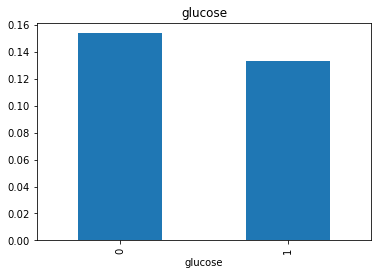

In [45]:
for feature in feature_with_nan:
    data = df.copy()
    
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    data.groupby(feature)['Heart-Att'].mean().plot.bar()
    plt.title(feature)
    plt.show()

From the above graph the missing value or the nan value are important for the predicting the target label

In [46]:
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [47]:
df['Gender'].replace({
    'Male' : 1,
    'Female' : 0
}, inplace=True)

#### Numerical Variables

In [48]:
numerical_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
print(f"Total number of numerical features are: {len(numerical_feature)}\n")
print(numerical_feature)

Total number of numerical features are: 16

['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BP Meds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'tot cholesterol', 'Systolic BP', 'Diastolic BP', 'BMI', 'heartRate', 'glucose', 'Heart-Att']


#### Discrete Features

In [49]:
discrete_feature = [feature for feature in numerical_feature if len(df[feature].unique()) < 25]
print(f"Total number of discrete features are: {len(discrete_feature)}")
print(discrete_feature)

Total number of discrete features are: 8
['Gender', 'education', 'currentSmoker', 'BP Meds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'Heart-Att']


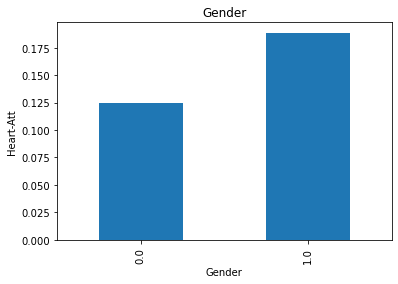

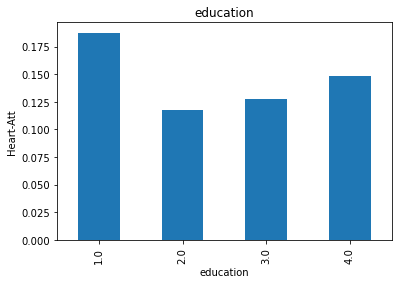

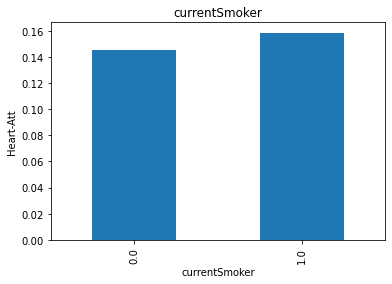

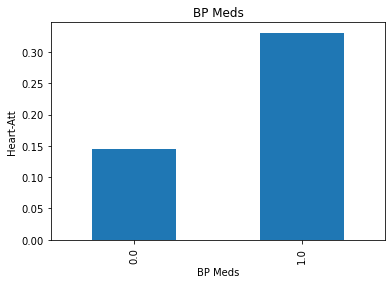

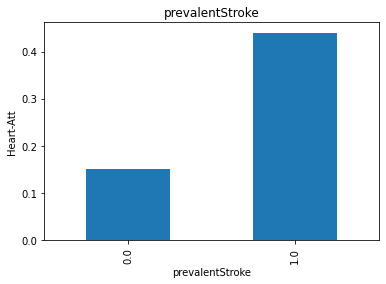

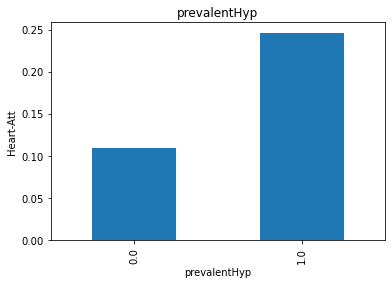

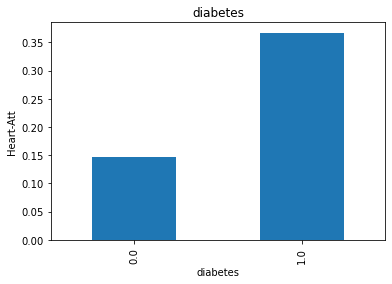

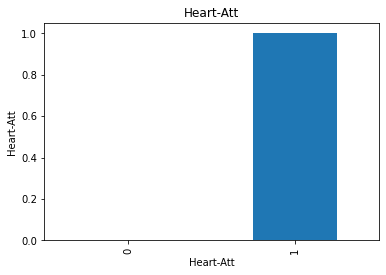

In [50]:
for feature in discrete_feature:
    dataset = df.copy()
    dataset.groupby(feature)['Heart-Att'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Heart-Att")
    plt.title(feature)
    plt.show()

#### Continous Features

In [51]:
continous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
print(f"Total number of continous features are: {len(continous_feature)}")
print(continous_feature)

Total number of continous features are: 8
['age', 'cigsPerDay', 'tot cholesterol', 'Systolic BP', 'Diastolic BP', 'BMI', 'heartRate', 'glucose']


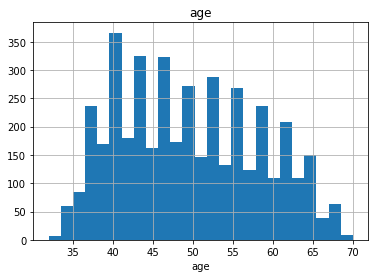

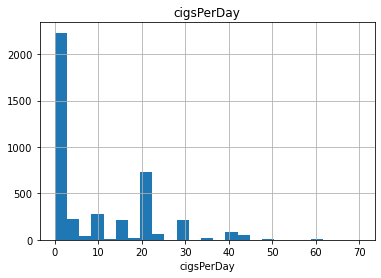

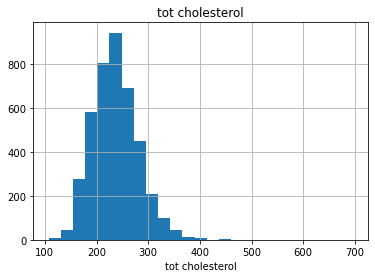

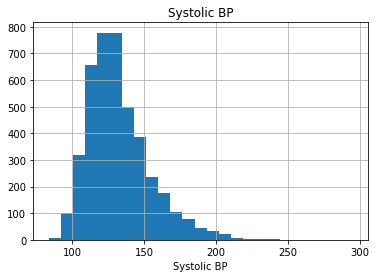

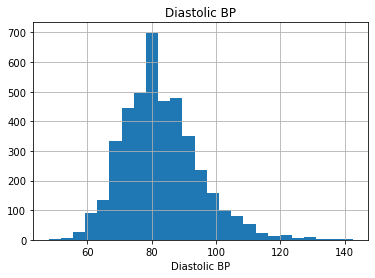

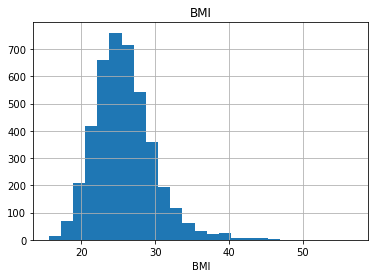

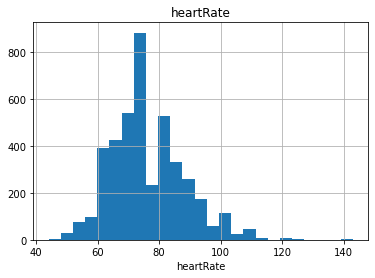

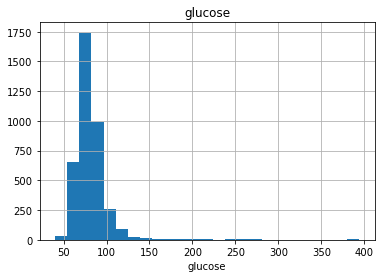

In [52]:
for feature in continous_feature:
    dataset1 = df.copy()
    dataset1[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()

All the continous features are normally distributed or gaussian distributed

#### Handling missing value using Random Sample Imputation method

In [53]:
def impute_nan(df, variable):
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state = 0)
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable] = random_sample

In [54]:
for feature in feature_with_nan:
    impute_nan(df, feature)
    print(f"{feature}: {df[feature].isnull().mean()} missing values")

Gender: 0.0 missing values
age: 0.0 missing values
education: 0.0 missing values
currentSmoker: 0.0 missing values
cigsPerDay: 0.0 missing values
BP Meds: 0.0 missing values
prevalentStroke: 0.0 missing values
prevalentHyp: 0.0 missing values
diabetes: 0.0 missing values
tot cholesterol: 0.0 missing values
Systolic BP: 0.0 missing values
Diastolic BP: 0.0 missing values
BMI: 0.0 missing values
heartRate: 0.0 missing values
glucose: 0.0 missing values


In [55]:
df.isnull().sum()

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BP Meds            0
prevalentStroke    0
prevalentHyp       0
diabetes           0
tot cholesterol    0
Systolic BP        0
Diastolic BP       0
BMI                0
heartRate          0
glucose            0
Heart-Att          0
dtype: int64

#### Outliers using boxplot

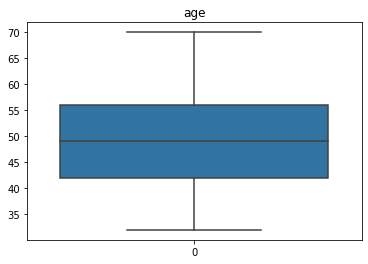

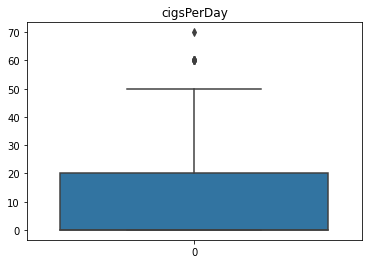

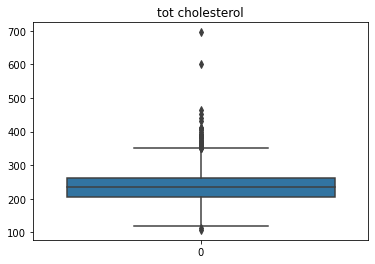

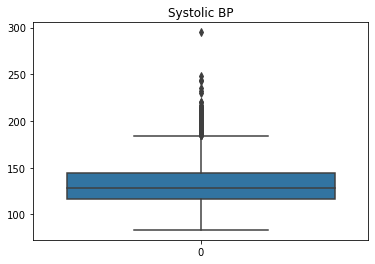

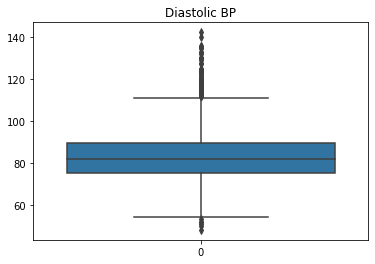

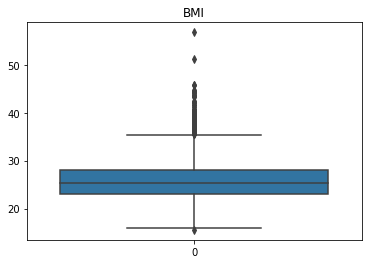

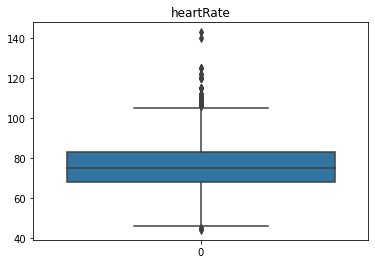

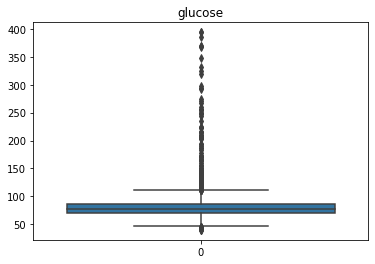

In [56]:
for feature in continous_feature:
    sns.boxplot(data=df[feature])
    plt.title(feature)
    plt.show()

In [57]:
outlier_features = ['tot cholesterol', 'Systolic BP', 'Diastolic BP', 'BMI', 'heartRate', 'glucose']

In [58]:
len(outlier_features), len(continous_feature)

(6, 8)

In [59]:
def outlier_handling(df, variable):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_bound = int(df[variable].quantile(0.25) - (1.5 * IQR))
    upper_bound = int(df[variable].quantile(0.75) + (1.5 * IQR))
    df.loc[df[variable] >= upper_bound, variable] = upper_bound
    df.loc[df[variable] <= lower_bound, variable] = lower_bound

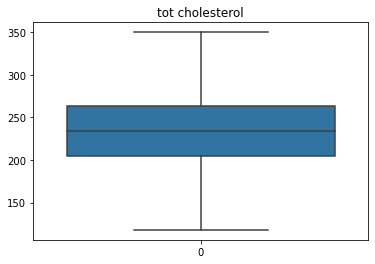

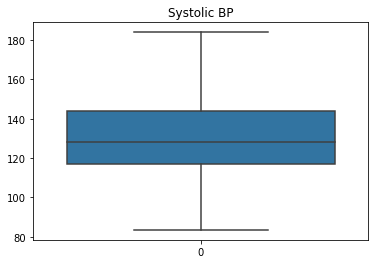

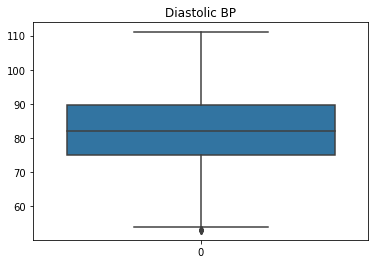

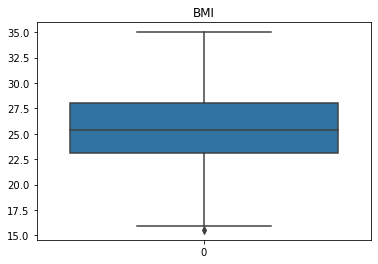

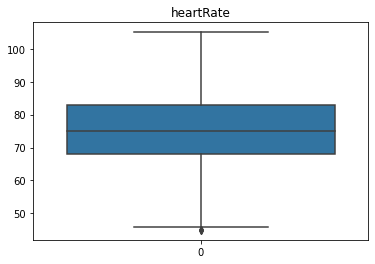

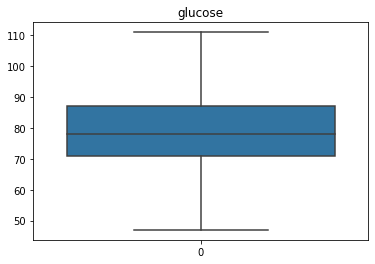

In [60]:
for feature in outlier_features:
    outlier_handling(df, feature)
    sns.boxplot(data=df[feature])
    plt.title(feature)
    plt.show()

All the putliers are removed

In [61]:
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0.0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0.0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [62]:
X = df.drop(['Heart-Att'], axis=1)

In [63]:
X.shape

(4240, 15)

In [64]:
Y = df['Heart-Att']

In [65]:
Y.shape

(4240,)

In [66]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [67]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))

In [68]:
feature_sel_model.fit(X, Y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [70]:
selected_features = feature_sel_model.get_support()

In [72]:
feature_name = X.columns[selected_features]

In [73]:
feature_name

Index(['Gender', 'age', 'cigsPerDay', 'tot cholesterol', 'Systolic BP',
       'Diastolic BP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [74]:
selected_features

array([ True,  True, False, False,  True, False, False, False, False,
        True,  True,  True,  True,  True,  True])

In [75]:
X.head(0)

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose


In [76]:
len(feature_name)

9

In [77]:
X = df[feature_name]

In [78]:
X.shape

(4240, 9)

In [79]:
X.head()

,Gender,age,cigsPerDay,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose
0,1.0,39.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0
1,0.0,46.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0
2,1.0,48.0,20.0,245.0,127.5,80.0,25.34,75.0,70.0
3,0.0,61.0,30.0,225.0,150.0,95.0,28.58,65.0,103.0
4,0.0,46.0,23.0,285.0,130.0,84.0,23.10,85.0,85.0


In [80]:
X = np.array(X)

In [82]:
Y = np.array(Y)

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [85]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=2000, num=10)]
criterion = ['gini', 'entropy', 'log_loss']
max_depth = [int(x) for x in np.linspace(start=10, stop=1000, num=10)]
min_samples_split = [2, 5, 7, 9, 10, 12, 15]
min_samples_leaf = [1, 2, 4, 6, 8, 10]
max_features = ['sqrt', 'log2', None]

In [88]:
random_grid = {
    'n_estimators' : n_estimators,
    'criterion' : criterion,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf,
    'max_features' : max_features,
}

In [89]:
from sklearn.model_selection import RandomizedSearchCV

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
rf = RandomForestClassifier()

In [92]:
from sklearn.model_selection import KFold

In [93]:
cv = KFold(n_splits=3, random_state=0, shuffle=True)

In [94]:
rf_randomcv = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=cv, verbose=2, random_state=0, n_jobs=-1)

In [95]:
rf_randomcv.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
                   estimator=RandomForestClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8, 10],
                                        'min_samples_split': [2, 5, 7, 9, 10,
                                                              12, 15],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=0, verbose=2)

In [96]:
best_params = rf_randomcv.best_params_

In [97]:
best_params

{'n_estimators': 100,
 'min_samples_split': 9,
 'min_samples_leaf': 8,
 'max_features': 'sqrt',
 'max_depth': 230,
 'criterion': 'entropy'}

In [98]:
param_grid = {
    'n_estimators' : [best_params['n_estimators']-300, best_params['n_estimators']-200,
                     best_params['n_estimators']-100, best_params['n_estimators'],
                     best_params['n_estimators']+100, best_params['n_estimators']+200,
                     best_params['n_estimators']+300],
    'criterion' : ['entropy'],
    'max_features' : ['sqrt'],
    'min_samples_split' : [best_params['min_samples_split']-3, best_params['min_samples_split']-2,
                          best_params['min_samples_split']-1, best_params['min_samples_split'],
                          best_params['min_samples_split']+1, best_params['min_samples_split']+2,
                          best_params['min_samples_split']+3],
    'min_samples_leaf' : [best_params['min_samples_leaf']-3, best_params['min_samples_leaf']-2,
                         best_params['min_samples_leaf']-1, best_params['min_samples_leaf'],
                         best_params['min_samples_leaf']+1, best_params['min_samples_leaf']+2,
                         best_params['min_samples_leaf']+3],
    'max_depth' : [best_params['max_depth']-30, best_params['max_depth']-20,
                  best_params['max_depth']-10, best_params['max_depth'],
                  best_params['max_depth']+10, best_params['max_depth']+20,
                  best_params['max_depth']+30]
}

In [99]:
from sklearn.model_selection import GridSearchCV

In [100]:
grid_searchcv = GridSearchCV(estimator=rf, param_grid=param_grid, cv=cv, n_jobs=-1, verbose=2)

In [101]:
grid_searchcv.fit(X_train, y_train)

Fitting 3 folds for each of 2401 candidates, totalling 7203 fits


C:\Users\19138\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3087 fits failed out of a total of 7203.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1029 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\19138\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\19138\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 396, in fit
    self._validate_estimator()
  File "C:\Users\19138\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py", line 143, in _validate_e

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'],
                         'max_depth': [200, 210, 220, 230, 240, 250, 260],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [5, 6, 7, 8, 9, 10, 11],
                         'min_samples_split': [6, 7, 8, 9, 10, 11, 12],
                         'n_estimators': [-200, -100, 0, 100, 200, 300, 400]},
             verbose=2)

In [102]:
best_estimator = grid_searchcv.best_estimator_

In [103]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [104]:
# Training dataset
y_pred_train = best_estimator.predict(X_train)

In [105]:
print(accuracy_score(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))
print(confusion_matrix(y_train, y_pred_train))

0.8672955974842768
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      2695
           1       0.98      0.13      0.23       485

    accuracy                           0.87      3180
   macro avg       0.92      0.57      0.58      3180
weighted avg       0.88      0.87      0.82      3180

[[2694    1]
 [ 421   64]]


In [106]:
# Testing dataset
y_pred_test = best_estimator.predict(X_test)

In [107]:
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))
print(accuracy_score(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       901
           1       0.57      0.03      0.05       159

    accuracy                           0.85      1060
   macro avg       0.71      0.51      0.48      1060
weighted avg       0.81      0.85      0.79      1060

[[898   3]
 [155   4]]
0.8509433962264151


In [108]:
from sklearn.metrics import roc_curve, roc_auc_score

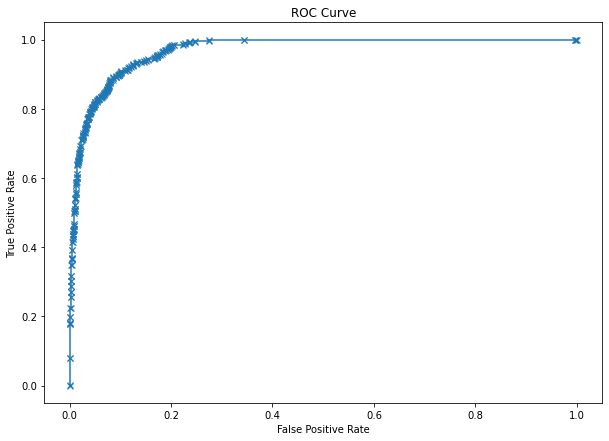

Area under Curve is: 0.968650613009965


In [114]:
rf_fpr, rf_tpr, threshold = roc_curve(y_train, best_estimator.predict_proba(X_train)[:, 1])
plt.figure(figsize=(10, 7))
plt.plot(rf_fpr, rf_tpr, marker='x', label='Random Forest')
# plt.plot(np.arange(1, 1.1, 0.1), np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print(f"Area under Curve is: {roc_auc_score(y_train, best_estimator.predict_proba(X_train)[:, 1])}")

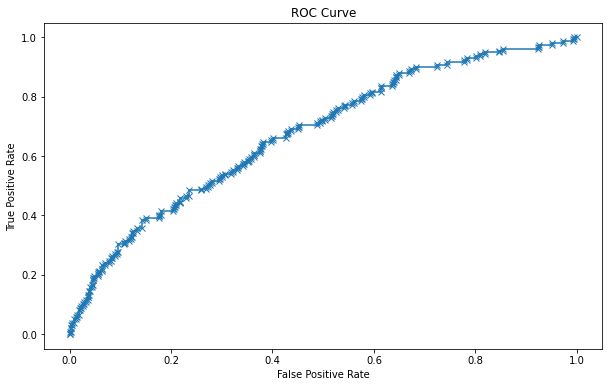

Area under the curve is: 0.6777445047082556


In [117]:
rf_fpr, rf_tpr, _ = roc_curve(y_test, best_estimator.predict_proba(X_test)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, marker='x', label='Random Forest')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()
print(f"Area under the curve is: {roc_auc_score(y_test, best_estimator.predict_proba(X_test)[:, 1])}")

The Area under the ROC curve for the training dataset is 96% and for the test dataset it is 67%. The Gap is 27% between the train and test set. Thus the problem of overfitting still exists. But still, the model is useful only in predicting class 0, and not class 1.

This is because, the dataset is imbalanced.

In [118]:
from sklearn.ensemble import AdaBoostClassifier

In [123]:
random_parameters = {
    'n_estimators' : [int(x) for x in np.linspace(start=100, stop=2000, num=10)],
    'learning_rate' : [float(x) for x in np.linspace(start=0.1, stop=100, num=1)],
    'algorithm' : ['SAMME', 'SAMME.R'],
    'random_state' : [None]
}

In [124]:
ad = AdaBoostClassifier()

In [125]:
ad_randomcv = RandomizedSearchCV(estimator=ad, param_distributions=random_parameters, n_iter=100, cv=cv, verbose=2, n_jobs=-1)

In [126]:
ad_randomcv.fit(X_train, y_train)

C:\Users\19138\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 20 is smaller than n_iter=100. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
                   estimator=AdaBoostClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0.1],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000],
                                        'random_state': [None]},
                   verbose=2)

In [128]:
ad_best_params = ad_randomcv.best_params_

In [129]:
ad_best_params

{'random_state': None,
 'n_estimators': 311,
 'learning_rate': 0.1,
 'algorithm': 'SAMME.R'}

In [130]:
ad_param_grid = {
    'random_state' : [None],
    'n_estimators' : [ad_best_params['n_estimators']-200, ad_best_params['n_estimators']-100,
                     ad_best_params['n_estimators'], ad_best_params['n_estimators']+100,
                     ad_best_params['n_estimators']+200],
    'learning_rate' : [ad_best_params['learning_rate']-0.025, ad_best_params['learning_rate']-0.05,
                      ad_best_params['learning_rate'], ad_best_params['learning_rate']+0.025,
                      ad_best_params['learning_rate']+0.05],
    'algorithm' : ['SAMME.R']
}

In [131]:
ad_gridsearchcv = GridSearchCV(estimator=ad, param_grid=ad_param_grid, n_jobs=-1, verbose=2, cv=cv)

In [132]:
ad_gridsearchcv.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME.R'],
                         'learning_rate': [0.07500000000000001, 0.05, 0.1,
                                           0.125, 0.15000000000000002],
                         'n_estimators': [111, 211, 311, 411, 511],
                         'random_state': [None]},
             verbose=2)

In [133]:
ad_best_estimator = ad_gridsearchcv.best_estimator_

In [134]:
ad_best_estimator

AdaBoostClassifier(learning_rate=0.1, n_estimators=211)

#### Training dataset (AdaBoostClassifier)

In [135]:
y_ad_pred_train = ad_best_estimator.predict(X_train)

In [136]:
print(accuracy_score(y_train, y_ad_pred_train))
print(confusion_matrix(y_train, y_ad_pred_train))
print(classification_report(y_train, y_ad_pred_train))

0.8528301886792453
[[2690    5]
 [ 463   22]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2695
           1       0.81      0.05      0.09       485

    accuracy                           0.85      3180
   macro avg       0.83      0.52      0.50      3180
weighted avg       0.85      0.85      0.79      3180



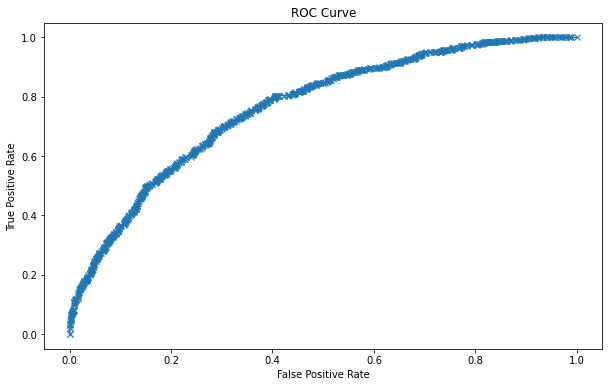

Area under the curve is:  0.762719430790123


In [138]:
rf_ad_fpr, rf_ad_tpr, _ = roc_curve(y_train, ad_best_estimator.predict_proba(X_train)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(rf_ad_fpr, rf_ad_tpr, marker='x', label='Adaboost Classifier')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()
print("Area under the curve is: ", roc_auc_score(y_train, ad_best_estimator.predict_proba(X_train)[:, 1]))

#### Test dataset (Adaboost Classifier)

In [139]:
y_ad_pred_test = ad_best_estimator.predict(X_test)

In [140]:
print(accuracy_score(y_test, y_ad_pred_test))
print(confusion_matrix(y_test, y_ad_pred_test))
print(classification_report(y_test, y_ad_pred_test))

0.8528301886792453
[[898   3]
 [153   6]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       901
           1       0.67      0.04      0.07       159

    accuracy                           0.85      1060
   macro avg       0.76      0.52      0.50      1060
weighted avg       0.83      0.85      0.79      1060



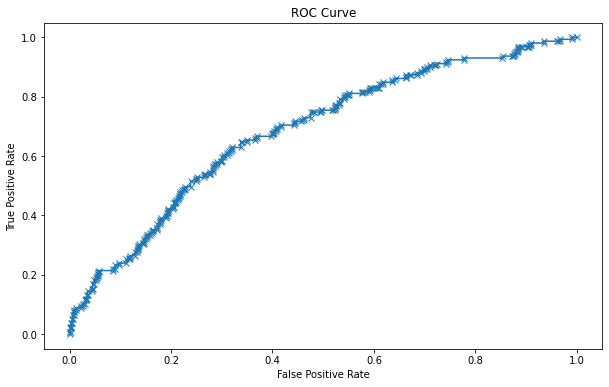

Area under the curve is:  0.6857021199366182


In [141]:
ad_fpr, ad_tpr, _ = roc_curve(y_test, ad_best_estimator.predict_proba(X_test)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(ad_fpr, ad_tpr, marker='x', label='AdaBoost Classifier')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()
print("Area under the curve is: ", roc_auc_score(y_test, ad_best_estimator.predict_proba(X_test)[:,1]))

Using Adaboost Classifier the area under the curve for the training dataset is 76% and for the test dataset it is 68%. The gap is 8% between the training and test dataset. Which is less compared to the RandomForestClassifier Alogorithm (27%).